In [1]:
from glob import glob
import sys
import getpass
import os
from os.path import join, dirname, getsize
import pickle
import numpy as np
import pandas as pd
import scipy

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
import seaborn as sns
import statsmodels.stats.multitest
# from statsmodels.sandbox.stats.multicomp import multipletests

import nilearn

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_validate, GroupKFold
from sklearn.preprocessing import StandardScaler
# from sklearn.svm import LinearSVC

# import mydef as my Class correction for projects
import mydef

/home/sungbeenpark/anaconda3/envs/sampark/lib/python3.9/site-packages/nilearn/datasets/__init__.py:86: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [2]:
GA = mydef.GA()

OS : linux
Google Drive is detected!
Git directory is detected!


## 1. ROI list

In [3]:
## initalizing
GA.roi_imgs = {}
suffix = None

1. Localizer

In [4]:
suffix = 'all_localizers'
path_list = sorted(glob(join(GA.dir_mask,'localizer','n200_*.nii')))
for path in path_list:
    roi = path.split('/')[-1].replace('_mask.nii', '')
    GA.roi_imgs[roi] = nilearn.image.load_img(path)
GA.roi_imgs

{'n200_c1-1_L_M1': <nibabel.nifti1.Nifti1Image at 0x7f7907011f10>,
 'n200_c1-2_L_S1': <nibabel.nifti1.Nifti1Image at 0x7f7a88417220>,
 'n200_c1_L_Postcentral': <nibabel.nifti1.Nifti1Image at 0x7f7a884178e0>,
 'n200_c1_R_SPL': <nibabel.nifti1.Nifti1Image at 0x7f7906ffd040>,
 'n200_c2_R_CerebellumIV-V': <nibabel.nifti1.Nifti1Image at 0x7f7906ffd3d0>,
 'n200_c2_R_MFG': <nibabel.nifti1.Nifti1Image at 0x7f7906ffd6d0>,
 'n200_c3_R_MTG': <nibabel.nifti1.Nifti1Image at 0x7f7906ffd820>,
 'n200_c3_R_Postcentral': <nibabel.nifti1.Nifti1Image at 0x7f7906ffdc70>,
 'n200_c4_L_IFG': <nibabel.nifti1.Nifti1Image at 0x7f7906ffdd90>,
 'n200_c4_L_Putamen': <nibabel.nifti1.Nifti1Image at 0x7f7907001220>,
 'n200_c5_L_SPL': <nibabel.nifti1.Nifti1Image at 0x7f7907001550>,
 'n200_c5_R_SMA': <nibabel.nifti1.Nifti1Image at 0x7f79070017f0>,
 'n200_c6_R_CerebellumVIIIb': <nibabel.nifti1.Nifti1Image at 0x7f79070010d0>,
 'n200_c6_R_MFG': <nibabel.nifti1.Nifti1Image at 0x7f7907001d90>,
 'n200_c7_L_Thalamus': <nibabel

In [5]:
suffix = '7localizers'
key_list = ['n200_c1_L_Postcentral'
            , 'n200_c2_R_CerebellumIV-V'
            , 'n200_c3_R_Postcentral'
            , 'n200_c4_L_Putamen'
            , 'n200_c5_R_SMA'
            , 'n200_c6_R_CerebellumVIIIb'
            , 'n200_c7_L_Thalamus']
temp = {}
for key in key_list:
    temp[key] = GA.roi_imgs[key]
GA.roi_imgs = temp
GA.roi_imgs

{'n200_c1_L_Postcentral': <nibabel.nifti1.Nifti1Image at 0x7f7a884178e0>,
 'n200_c2_R_CerebellumIV-V': <nibabel.nifti1.Nifti1Image at 0x7f7906ffd3d0>,
 'n200_c3_R_Postcentral': <nibabel.nifti1.Nifti1Image at 0x7f7906ffdc70>,
 'n200_c4_L_Putamen': <nibabel.nifti1.Nifti1Image at 0x7f7907001220>,
 'n200_c5_R_SMA': <nibabel.nifti1.Nifti1Image at 0x7f79070017f0>,
 'n200_c6_R_CerebellumVIIIb': <nibabel.nifti1.Nifti1Image at 0x7f79070010d0>,
 'n200_c7_L_Thalamus': <nibabel.nifti1.Nifti1Image at 0x7f7907001d00>}

2. DMN

In [3]:
suffix = 'DMN'

## DMN regions(global)
module_names = ['Core', 'dMsub', 'MTLsub']

for name in module_names:
    DMN_list = glob(join(GA.dir_mask,'DMN',name+'.nii'))
    for path in DMN_list:
        fname = path.split('/')[-1].replace('.nii', '')
        GA.roi_imgs[fname] = nilearn.image.load_img(path)
        
# ## DMN regions(detail)
module_names = ['Core', 'dMsub', 'MTLsub']

for name in module_names:
    DMN_list = glob(join(GA.dir_mask,'DMN',name+'_*.nii'))
    for path in DMN_list:
        fname = path.split('/')[-1].replace('.nii', '')
        GA.roi_imgs[fname] = nilearn.image.load_img(path)

GA.roi_imgs

{'Core': <nibabel.nifti1.Nifti1Image at 0x7fe728841a50>,
 'dMsub': <nibabel.nifti1.Nifti1Image at 0x7fe729da9810>,
 'MTLsub': <nibabel.nifti1.Nifti1Image at 0x7fe729da9a50>,
 'Core_PCC_r': <nibabel.nifti1.Nifti1Image at 0x7fe729da98d0>,
 'Core_aMPFC_l': <nibabel.nifti1.Nifti1Image at 0x7fe729da9d10>,
 'Core_PCC_l': <nibabel.nifti1.Nifti1Image at 0x7fe729db81d0>,
 'Core_aMPFC_r': <nibabel.nifti1.Nifti1Image at 0x7fe729db8450>,
 'dMsub_TempP_r_temp': <nibabel.nifti1.Nifti1Image at 0x7fe729db8510>,
 'dMsub_dMPFC': <nibabel.nifti1.Nifti1Image at 0x7fe729db8910>,
 'dMsub_TempP_l_temp': <nibabel.nifti1.Nifti1Image at 0x7fe729db8ad0>,
 'dMsub_TPJ_l': <nibabel.nifti1.Nifti1Image at 0x7fe729db8d50>,
 'dMsub_LTC_l': <nibabel.nifti1.Nifti1Image at 0x7fe729db8b90>,
 'dMsub_TPJ_r': <nibabel.nifti1.Nifti1Image at 0x7fe729dc1150>,
 'dMsub_LTC_r': <nibabel.nifti1.Nifti1Image at 0x7fe729dc1410>,
 'MTLsub_HF_r': <nibabel.nifti1.Nifti1Image at 0x7fe729dc1610>,
 'MTLsub_PHC_r': <nibabel.nifti1.Nifti1Image

3. Yeo's network #1

In [3]:
GA.load_fan()

suffix = 'Yeo_network17_1'
## yeo_17network == 1
dt = pd.DataFrame()
for nn in [1]:
    dt = dt.append(GA.fan_info[(GA.fan_info.yeo_17network == nn)])
for idx in dt.index:
    nn = dt.loc[idx,'label']
    region = dt.loc[idx,'region']
    GA.roi_imgs[region] = GA.fan_imgs[str(nn)]
GA.roi_imgs

{'FuG_L_3_2': <nibabel.nifti1.Nifti1Image at 0x7fcb93d08fa0>,
 'FuG_R_3_2': <nibabel.nifti1.Nifti1Image at 0x7fcb93d4d9d0>,
 'MVOcC_L_5_1': <nibabel.nifti1.Nifti1Image at 0x7fcb93d7aeb0>,
 'MVOcC_R_5_1': <nibabel.nifti1.Nifti1Image at 0x7fcb93d4ddc0>,
 'MVOcC_L_5_3': <nibabel.nifti1.Nifti1Image at 0x7fcb93d34250>,
 'MVOcC_R_5_3': <nibabel.nifti1.Nifti1Image at 0x7fcb93d7a8b0>,
 'MVOcC_R_5_4': <nibabel.nifti1.Nifti1Image at 0x7fcb93d80dc0>,
 'LOcC_L_4_1': <nibabel.nifti1.Nifti1Image at 0x7fcb93ca3c70>,
 'LOcC_R_4_1': <nibabel.nifti1.Nifti1Image at 0x7fcb93f84670>,
 'LOcC_L_4_3': <nibabel.nifti1.Nifti1Image at 0x7fcb93d3c940>,
 'LOcC_R_4_3': <nibabel.nifti1.Nifti1Image at 0x7fcb93d8af70>,
 'LOcC_L_4_4': <nibabel.nifti1.Nifti1Image at 0x7fcb93d462e0>,
 'LOcC_R_4_4': <nibabel.nifti1.Nifti1Image at 0x7fcb93d32700>,
 'LOcC_L_2_2': <nibabel.nifti1.Nifti1Image at 0x7fcb93d75a60>}

In [4]:
## combining visual ROIs
## yeo_17network == 1
roi_imgs_vis1 = {}

temp = GA.fan_info[(GA.fan_info.yeo_17network == 1)]

for idx in temp.index:
    nn = temp.loc[idx,'label']
    region = temp.loc[idx,'region']
    
    path = join(GA.dir_mask,'fan280','fan.roi.GA.%03d.nii.gz'%nn)
    roi_imgs_vis1[region] = nilearn.image.load_img(path)

In [5]:
## Merging
roi_vis1 = nilearn.image.math_img(img1=roi_imgs_vis1['FuG_L_3_2'], formula="img1*0")

for _, img in roi_imgs_vis1.items():
    roi_vis1 = nilearn.image.math_img(img1=roi_vis1, img2=img, formula="(img1+img2) > 0")
GA.roi_imgs['yeo_network17_1'] = roi_vis1

GA.roi_imgs

{'FuG_L_3_2': <nibabel.nifti1.Nifti1Image at 0x7fcb93d08fa0>,
 'FuG_R_3_2': <nibabel.nifti1.Nifti1Image at 0x7fcb93d4d9d0>,
 'MVOcC_L_5_1': <nibabel.nifti1.Nifti1Image at 0x7fcb93d7aeb0>,
 'MVOcC_R_5_1': <nibabel.nifti1.Nifti1Image at 0x7fcb93d4ddc0>,
 'MVOcC_L_5_3': <nibabel.nifti1.Nifti1Image at 0x7fcb93d34250>,
 'MVOcC_R_5_3': <nibabel.nifti1.Nifti1Image at 0x7fcb93d7a8b0>,
 'MVOcC_R_5_4': <nibabel.nifti1.Nifti1Image at 0x7fcb93d80dc0>,
 'LOcC_L_4_1': <nibabel.nifti1.Nifti1Image at 0x7fcb93ca3c70>,
 'LOcC_R_4_1': <nibabel.nifti1.Nifti1Image at 0x7fcb93f84670>,
 'LOcC_L_4_3': <nibabel.nifti1.Nifti1Image at 0x7fcb93d3c940>,
 'LOcC_R_4_3': <nibabel.nifti1.Nifti1Image at 0x7fcb93d8af70>,
 'LOcC_L_4_4': <nibabel.nifti1.Nifti1Image at 0x7fcb93d462e0>,
 'LOcC_R_4_4': <nibabel.nifti1.Nifti1Image at 0x7fcb93d32700>,
 'LOcC_L_2_2': <nibabel.nifti1.Nifti1Image at 0x7fcb93d75a60>,
 'yeo_network17_1': <nibabel.nifti1.Nifti1Image at 0x7fcb93cbe520>}

4. Ventral visual stream (TT_Daemon, Brodmann Area)

In [ ]:
path_list = glob(join(GA.dir_mask, 'TT_Daemon', '*.brik1.BA???.*.nii.gz'))
for path in path_list:
    temp = path.split('/')[-1].replace('.nii.gz', '')
    fname = temp.split('.')[2]
    GA.roi_imgs[fname] = nilearn.image.load_img(path)
GA.roi_imgs

#### *Visualization ROIs (optional)

In [ ]:
GA.plot_rois()

## *2. Calculation (run once)

In [7]:
for subj in GA.list_subj:
    for stage in GA.list_stage:
        GA.cross_valid(GA.load_beta(subj, stage))

In [8]:
## save the result as a pickle file
GA.save_as_pkl(path=GA.dir_script, data=GA.scores, suffix='decacc.%s'%suffix)

## 3. Loading a previous result

In [6]:
GA.show_pkl_list(path=GA.dir_script, word='decacc.%s'%suffix)

,name,identity
0,./20210714.decacc.7localizers.pkl,a


In [7]:
GA.make_df_score(fname='./20210714.decacc.%s.pkl'%suffix)

,subj,stage,ROI,mean_accuracy
0,01,early_practice,n200_c1_L_Postcentral,0.378472
1,01,early_practice,n200_c2_R_CerebellumIV-V,0.260417
2,01,early_practice,n200_c3_R_Postcentral,0.312500
3,01,early_practice,n200_c4_L_Putamen,0.260417
4,01,early_practice,n200_c5_R_SMA,0.336806
...,...,...,...,...
835,44,late_unpractice,n200_c3_R_Postcentral,0.288194
836,44,late_unpractice,n200_c4_L_Putamen,0.319444
837,44,late_unpractice,n200_c5_R_SMA,0.250000
838,44,late_unpractice,n200_c6_R_CerebellumVIIIb,0.277778


## 4. Plotting the decoding accuracy

<AxesSubplot:xlabel='Stage', ylabel='Mean Accuracy'>

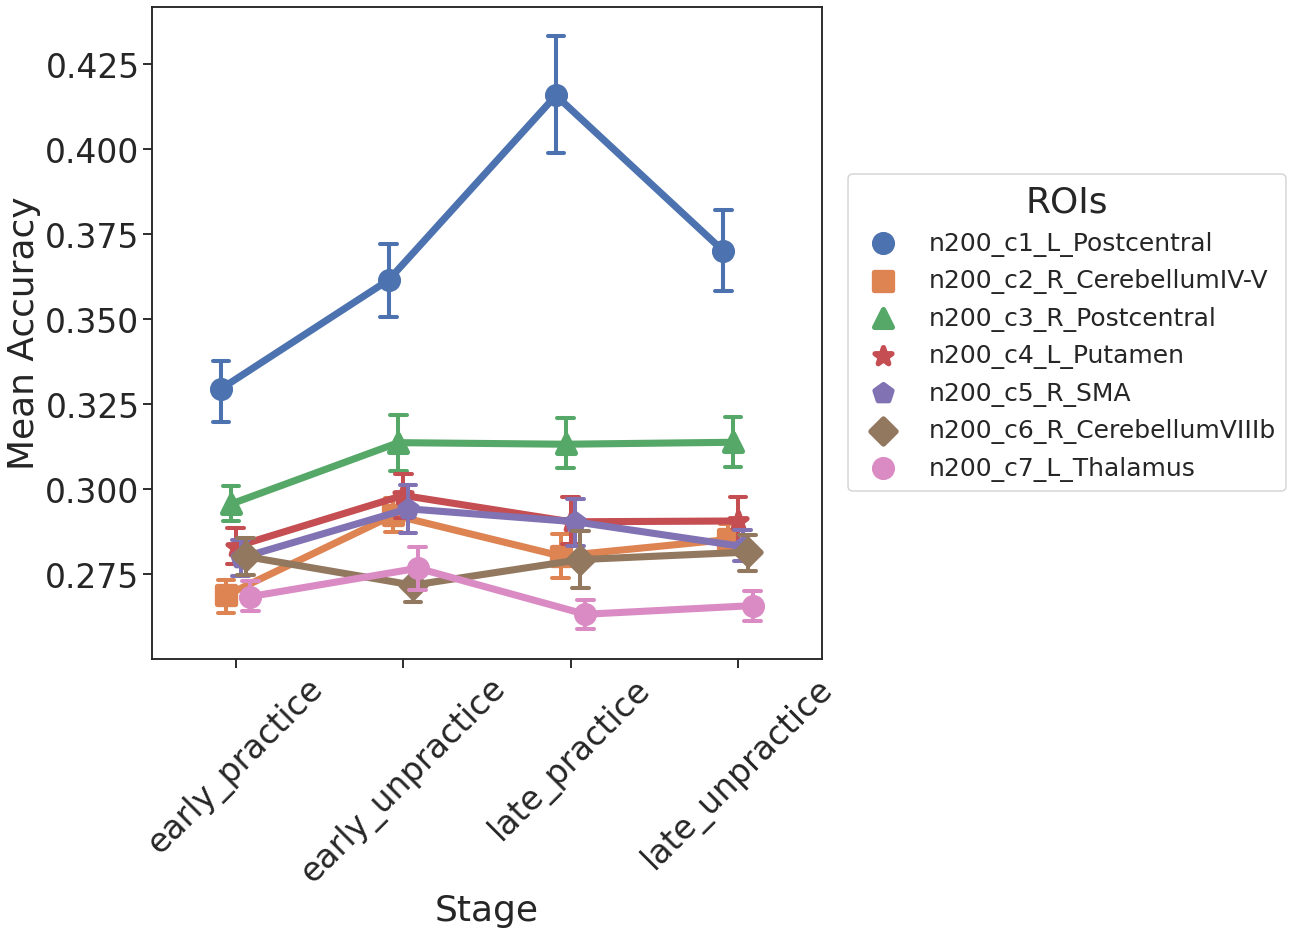

In [8]:
plt.figure(figsize=(12,12))
GA.plot_df_score(legend_outside=True, font_magn=2.)

In [9]:
visit = []
mapping = []
for s in GA.df_score.stage:
    [v, m] = s.split('_')
    visit.append(v)
    mapping.append(m)
temp = GA.df_score; temp['visit'] = visit; temp['mapping'] = mapping
temp

,subj,stage,ROI,mean_accuracy,visit,mapping
0,01,early_practice,n200_c1_L_Postcentral,0.378472,early,practice
1,01,early_practice,n200_c2_R_CerebellumIV-V,0.260417,early,practice
2,01,early_practice,n200_c3_R_Postcentral,0.312500,early,practice
3,01,early_practice,n200_c4_L_Putamen,0.260417,early,practice
4,01,early_practice,n200_c5_R_SMA,0.336806,early,practice
...,...,...,...,...,...,...
835,44,late_unpractice,n200_c3_R_Postcentral,0.288194,late,unpractice
836,44,late_unpractice,n200_c4_L_Putamen,0.319444,late,unpractice
837,44,late_unpractice,n200_c5_R_SMA,0.250000,late,unpractice
838,44,late_unpractice,n200_c6_R_CerebellumVIIIb,0.277778,late,unpractice


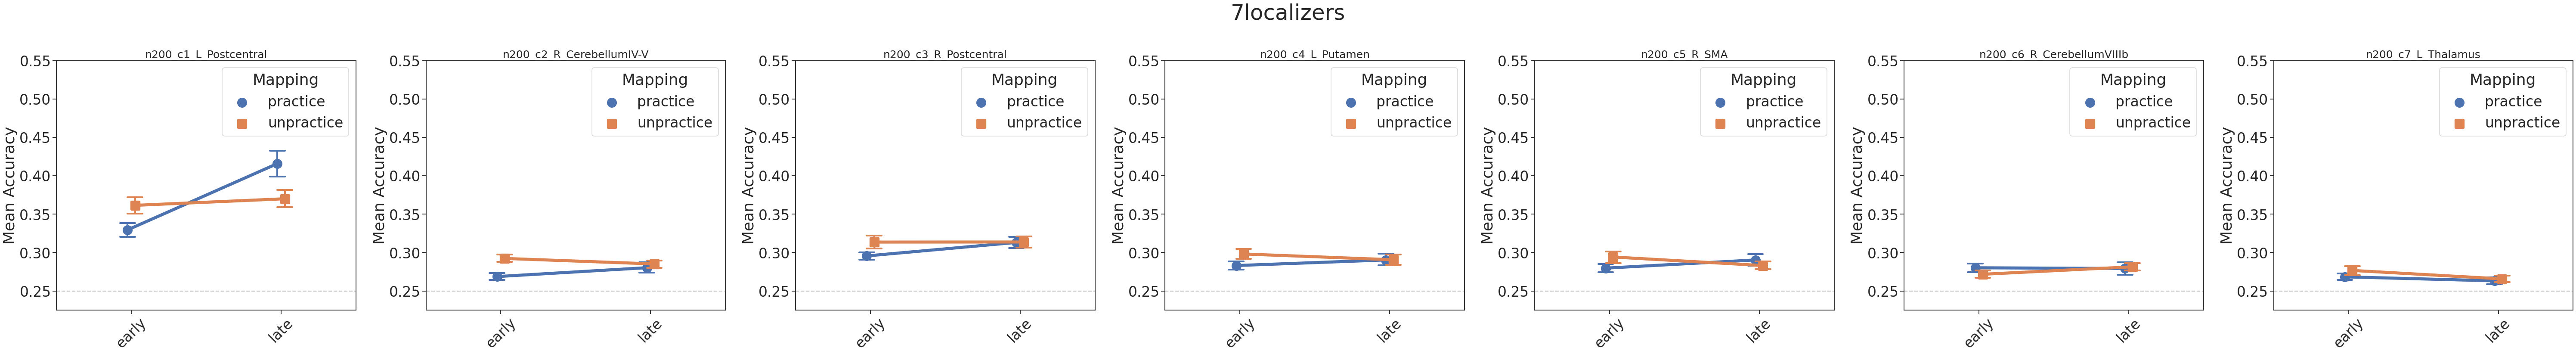

In [10]:
nroi = len(temp.ROI.unique())
nrow = 1
ncol = nroi
fig, axes = plt.subplots(nrows=nrow, ncols=ncol
                         , figsize=(ncol*12, nrow*12))
fig.suptitle(suffix, fontsize=50)
for i, roi in enumerate(sorted(temp.ROI.unique())):
    ax = GA.plot_df_score(data=temp[temp.ROI==roi]
                          , x='visit', y='mean_accuracy', hue='mapping'
                          , xlabel=None
                          , ylim=(.225, .55), hline=.25
                          , title=roi, ax=axes[i])
    ax.legend(title='Mapping')
fig.tight_layout()

In [11]:
# GA.plot_rois(figsize=(8,8))
# plt.savefig(join(GA.dir_git,'GA','images',"%s_rois.%s.png"%(GA.today, suffix)))

In [13]:
def set_frame(Bbox, cp=[.5,.8]):
    ########################################################################
    ## Bbox: A bounding box                                               ## 
    ## cp: center point of a new Bbox, input Bbox의 가로, 세로를 1로 기준 ##
    ########################################################################
    bl, tr = np.array(Bbox.get_points())
    ## top-right
    B = tr
    ## center
    r = np.array(cp)
    C = r*B + (1-r)*bl
    ## bottom-left
    A = 2*C - B
    ## adjusted bbox
    A = C + (A-C)*.9
    B = C + (B-C)*.9
    ## Rectangle
    rect = np.array([A, B-A])
    return rect

- 7localizers

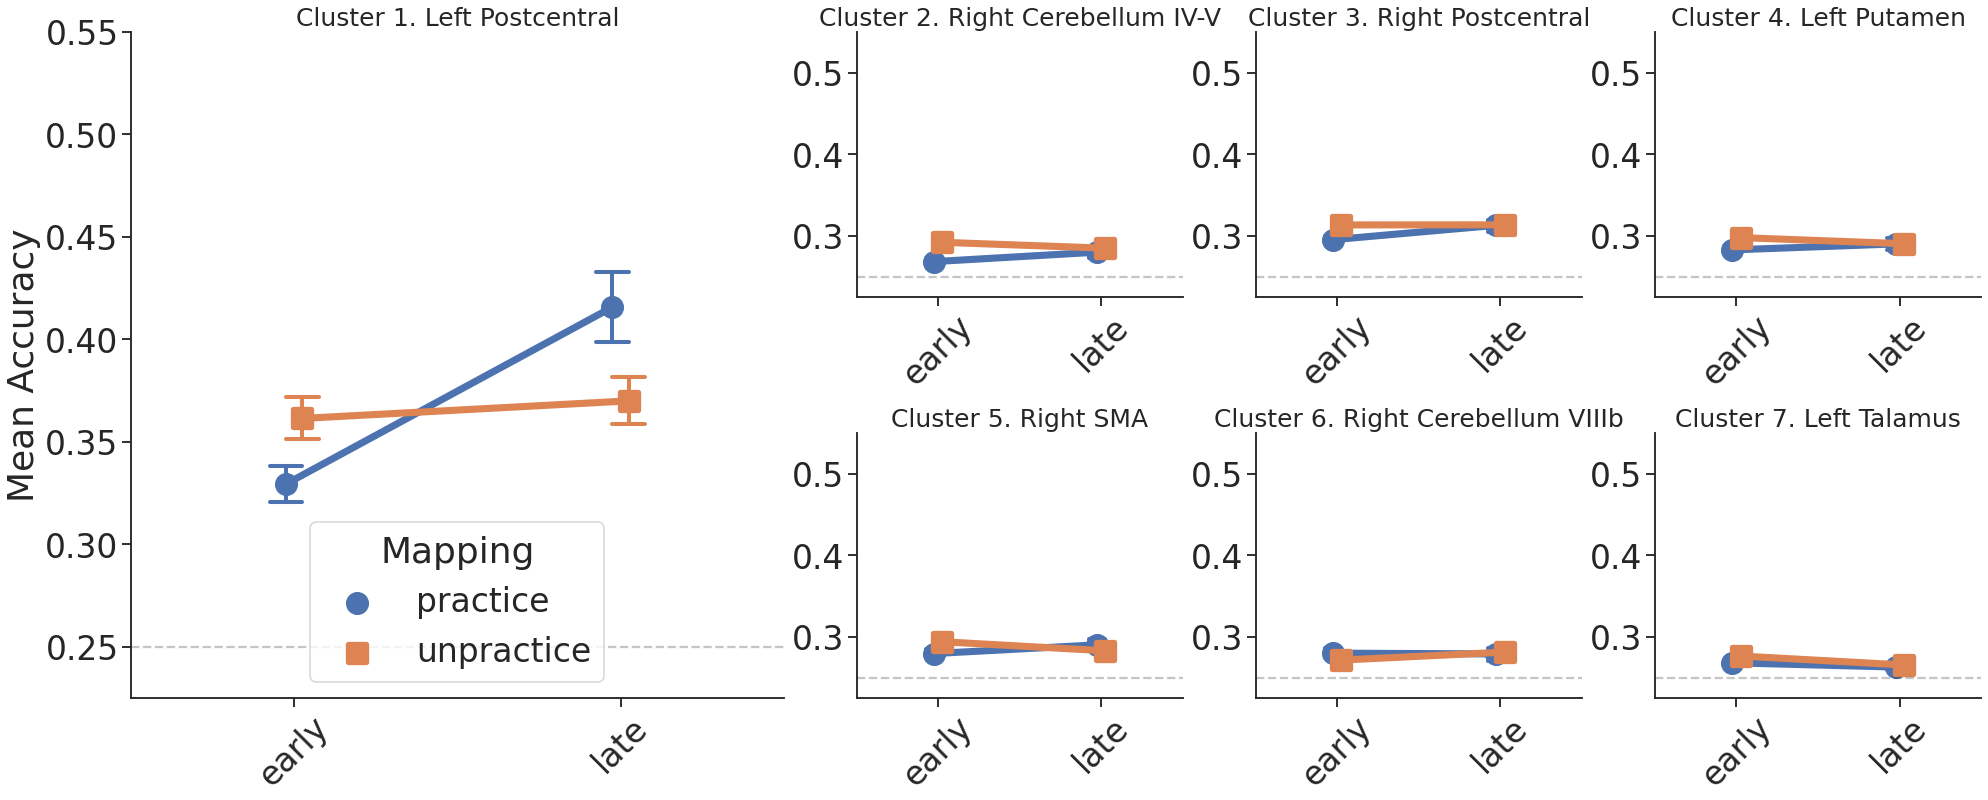

In [28]:
nrows, ncols = 2, 5
fig = plt.figure(figsize=(ncols*5.5, nrows*5.5), constrained_layout=True)
gs = fig.add_gridspec(nrows=nrows, ncols=ncols)

axs = []
axs.append(fig.add_subplot(gs[:, :2]))
axs.append(fig.add_subplot(gs[0, 2]))
axs.append(fig.add_subplot(gs[0, 3]))
axs.append(fig.add_subplot(gs[0, 4]))
axs.append(fig.add_subplot(gs[1, 2]))
axs.append(fig.add_subplot(gs[1, 3]))
axs.append(fig.add_subplot(gs[1, 4]))

rois_rename = ['Cluster 1. Left Postcentral'
               , 'Cluster 2. Right Cerebellum IV-V'
               , 'Cluster 3. Right Postcentral'
               , 'Cluster 4. Left Putamen'
               , 'Cluster 5. Right SMA'
               , 'Cluster 6. Right Cerebellum VIIIb'
               , 'Cluster 7. Left Talamus']

for i, roi in enumerate(sorted(temp.ROI.unique())):
    ax = GA.plot_df_score(data=temp[temp.ROI==roi]
                          , x='visit', y='mean_accuracy', hue='mapping'
                          , xlabel=None
                          , ylim=(.225, .55), hline=.25
                          , title=rois_rename[i], ax=axs[i])
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    if i == 0:
        ax.legend(title='Mapping', loc='lower center')
    else:
        ax.legend().remove()
        ax.set_ylabel(None)

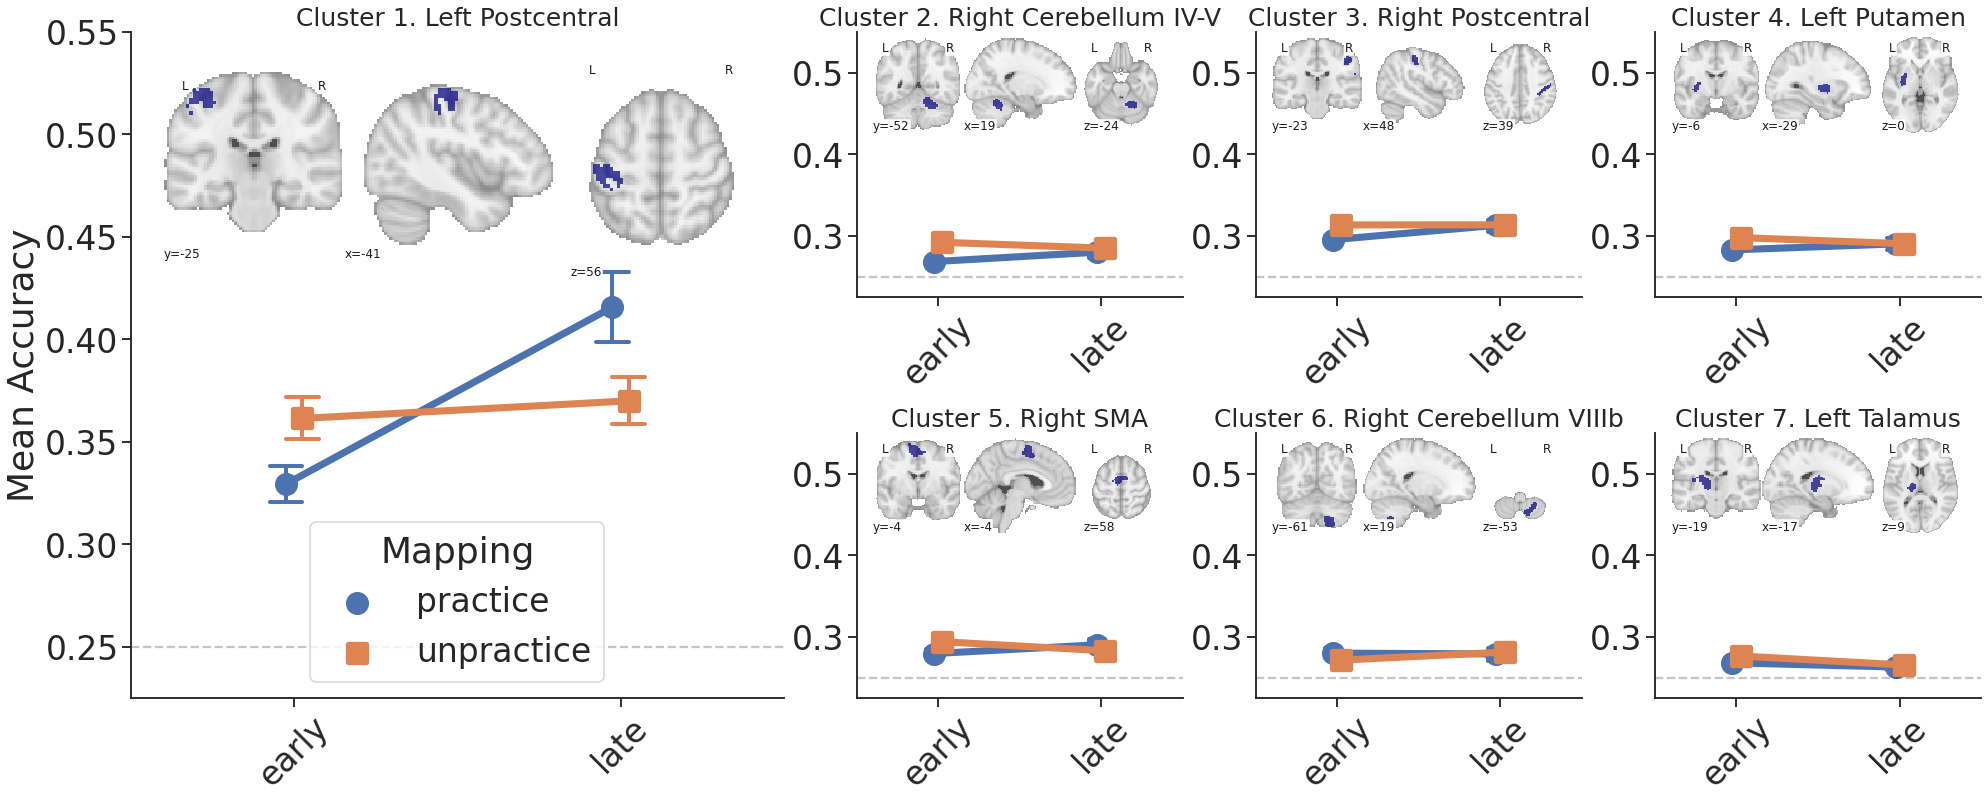

In [29]:
for i, ax in enumerate(fig.get_axes()):
#     circ = mpatches.Circle((0.5, 0.5), 0.25, transform=ax.transAxes,
#                        facecolor='blue', alpha=0.75)
    roi = ax.get_title()
    ## Bounding box
    bbox = ax.get_position()
    rect = set_frame(bbox)
    ax_insert = fig.add_axes(np.concatenate(rect))
    nilearn.plotting.plot_roi(list(GA.roi_imgs.values())[i]
                              , draw_cross=False, axes=ax_insert)
fig

In [31]:
fig.savefig(join(GA.dir_work,'revision','%s.GA.decoding_7localizers.pdf'%GA.today))

FileNotFoundError: [Errno 2] No such file or directory: '/home/sungbeenpark/GoogleDrive/GA/revision/20210907.GA.decoding_7localizers.pdf'

## 5. t-test

In [8]:
GA.do_paired_ttest(cond_A='early_practice', cond_B='late_practice', data=GA.df_score, alpha=.005)

,ROI,cond_A,cond_B,tval,two-sided p-value,rejected,pval-corrected
0,Core,early_practice,late_practice,3.047261,0.004886,True,0.004886
1,dMsub,early_practice,late_practice,2.139986,0.040898,False,0.040898
2,MTLsub,early_practice,late_practice,0.412475,0.683024,False,0.683024
3,Core_PCC_r,early_practice,late_practice,1.304728,0.202245,False,0.202245
4,Core_aMPFC_l,early_practice,late_practice,0.494325,0.624801,False,0.624801
5,Core_PCC_l,early_practice,late_practice,0.887490,0.382117,False,0.382117
6,Core_aMPFC_r,early_practice,late_practice,0.985765,0.332402,False,0.332402
7,dMsub_TempP_r_temp,early_practice,late_practice,4.239094,0.000208,True,0.000208
8,dMsub_dMPFC,early_practice,late_practice,0.528320,0.601297,False,0.601297
9,dMsub_TempP_l_temp,early_practice,late_practice,0.882722,0.384646,False,0.384646


In [9]:
GA.do_paired_ttest(cond_A='early_practice', cond_B='early_unpractice', data=GA.df_score, alpha=.005)

,ROI,cond_A,cond_B,tval,two-sided p-value,rejected,pval-corrected
0,Core,early_practice,early_unpractice,-0.390896,0.698731,False,0.698731
1,dMsub,early_practice,early_unpractice,-1.519187,0.139544,False,0.139544
2,MTLsub,early_practice,early_unpractice,-0.558929,0.580501,False,0.580501
3,Core_PCC_r,early_practice,early_unpractice,0.047081,0.962771,False,0.962771
4,Core_aMPFC_l,early_practice,early_unpractice,-0.632236,0.532186,False,0.532186
5,Core_PCC_l,early_practice,early_unpractice,-0.304243,0.763115,False,0.763115
6,Core_aMPFC_r,early_practice,early_unpractice,-2.324892,0.027282,False,0.027282
7,dMsub_TempP_r_temp,early_practice,early_unpractice,0.963350,0.343336,False,0.343336
8,dMsub_dMPFC,early_practice,early_unpractice,-2.442326,0.020923,False,0.020923
9,dMsub_TempP_l_temp,early_practice,early_unpractice,-0.915726,0.367363,False,0.367363


In [10]:
GA.do_paired_ttest(cond_A='late_practice', cond_B='late_unpractice', data=GA.df_score, alpha=.005)

,ROI,cond_A,cond_B,tval,two-sided p-value,rejected,pval-corrected
0,Core,late_practice,late_unpractice,-1.851361e+00,0.074326,False,0.074326
1,dMsub,late_practice,late_unpractice,-3.086235e+00,0.004429,True,0.004429
2,MTLsub,late_practice,late_unpractice,-9.828055e-01,0.333832,False,0.333832
3,Core_PCC_r,late_practice,late_unpractice,-1.466679e+00,0.153225,False,0.153225
4,Core_aMPFC_l,late_practice,late_unpractice,-5.480290e-01,0.587866,False,0.587866
5,Core_PCC_l,late_practice,late_unpractice,-5.766335e-01,0.568636,False,0.568636
6,Core_aMPFC_r,late_practice,late_unpractice,-1.768006e+00,0.087581,False,0.087581
7,dMsub_TempP_r_temp,late_practice,late_unpractice,-7.671701e-01,0.449182,False,0.449182
8,dMsub_dMPFC,late_practice,late_unpractice,-1.672142e+00,0.105253,False,0.105253
9,dMsub_TempP_l_temp,late_practice,late_unpractice,5.614140e-01,0.578828,False,0.578828


In [11]:
GA.do_1sample_ttest(stage='early_practice', data=GA.df_score, mean=.25, alpha=.005)

,ROI,stage,tval,pval_uncorrected,rejected,pval_corrected
0,Core,early_practice,9.557470,1.824209e-10,True,1.824209e-10
1,dMsub,early_practice,5.784743,2.879420e-06,True,2.879420e-06
2,MTLsub,early_practice,12.597609,2.757169e-13,True,2.757169e-13
3,Core_PCC_r,early_practice,4.341874,1.570437e-04,True,1.570437e-04
4,Core_aMPFC_l,early_practice,4.303960,1.743049e-04,True,1.743049e-04
5,Core_PCC_l,early_practice,4.362740,1.482769e-04,True,1.482769e-04
6,Core_aMPFC_r,early_practice,3.927922,4.863837e-04,True,4.863837e-04
7,dMsub_TempP_r_temp,early_practice,6.640872,2.791293e-07,True,2.791293e-07
8,dMsub_dMPFC,early_practice,2.639808,1.321310e-02,False,1.321310e-02
9,dMsub_TempP_l_temp,early_practice,3.729146,8.302560e-04,True,8.302560e-04


In [12]:
GA.do_1sample_ttest(stage='late_practice', data=GA.df_score, mean=.25, alpha=.005)

,ROI,stage,tval,pval_uncorrected,rejected,pval_corrected
0,Core,late_practice,3.259191,2.851428e-03,True,2.851428e-03
1,dMsub,late_practice,3.605832,1.152894e-03,True,1.152894e-03
2,MTLsub,late_practice,7.334242,4.439901e-08,True,4.439901e-08
3,Core_PCC_r,late_practice,2.409334,2.255634e-02,False,2.255634e-02
4,Core_aMPFC_l,late_practice,4.343465,1.563576e-04,True,1.563576e-04
5,Core_PCC_l,late_practice,3.032346,5.071951e-03,False,5.071951e-03
6,Core_aMPFC_r,late_practice,2.814923,8.677852e-03,False,8.677852e-03
7,dMsub_TempP_r_temp,late_practice,2.624293,1.370684e-02,False,1.370684e-02
8,dMsub_dMPFC,late_practice,2.200810,3.586352e-02,False,3.586352e-02
9,dMsub_TempP_l_temp,late_practice,3.014728,5.300587e-03,False,5.300587e-03


In [13]:
GA.do_1sample_ttest(stage='early_unpractice', data=GA.df_score, mean=.25, alpha=.005)

,ROI,stage,tval,pval_uncorrected,rejected,pval_corrected
0,Core,early_unpractice,7.740036,1.553432e-08,True,1.553432e-08
1,dMsub,early_unpractice,8.474080,2.449785e-09,True,2.449785e-09
2,MTLsub,early_unpractice,10.933011,8.399663e-12,True,8.399663e-12
3,Core_PCC_r,early_unpractice,3.691938,9.169841e-04,True,9.169841e-04
4,Core_aMPFC_l,early_unpractice,4.261510,1.958627e-04,True,1.958627e-04
5,Core_PCC_l,early_unpractice,3.924405,4.910333e-04,True,4.910333e-04
6,Core_aMPFC_r,early_unpractice,6.662575,2.633160e-07,True,2.633160e-07
7,dMsub_TempP_r_temp,early_unpractice,5.592703,4.894442e-06,True,4.894442e-06
8,dMsub_dMPFC,early_unpractice,6.178657,9.767903e-07,True,9.767903e-07
9,dMsub_TempP_l_temp,early_unpractice,5.463812,6.994452e-06,True,6.994452e-06


In [14]:
GA.do_1sample_ttest(stage='late_unpractice', data=GA.df_score, mean=.25, alpha=.005)

,ROI,stage,tval,pval_uncorrected,rejected,pval_corrected
0,Core,late_unpractice,5.967202,1.742827e-06,True,1.742827e-06
1,dMsub,late_unpractice,7.205886,6.214671e-08,True,6.214671e-08
2,MTLsub,late_unpractice,9.895958,8.362789e-11,True,8.362789e-11
3,Core_PCC_r,late_unpractice,4.383198,1.401521e-04,True,1.401521e-04
4,Core_aMPFC_l,late_unpractice,4.046538,3.525206e-04,True,3.525206e-04
5,Core_PCC_l,late_unpractice,5.210050,1.414794e-05,True,1.414794e-05
6,Core_aMPFC_r,late_unpractice,5.957458,1.790087e-06,True,1.790087e-06
7,dMsub_TempP_r_temp,late_unpractice,3.567017,1.277622e-03,True,1.277622e-03
8,dMsub_dMPFC,late_unpractice,3.947171,4.616900e-04,True,4.616900e-04
9,dMsub_TempP_l_temp,late_unpractice,2.222099,3.423734e-02,False,3.423734e-02
